---
# **1. Introduction**

  * **NAME  : JOHN KRISTIAN VIERI**
  * **BATCH : 11**


---

# About Dataset
* Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

* ***The data set includes information about :***

  1. Customers who left within the last month – the column is called Churn
  Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

  2. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

  3. Demographic info about customers – gender, age range, and if they have partners and dependents


----

# Objective

* "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.".

----

# 2.Import Library

In [ ]:
################################################################################
# Data manipulation
import pandas as pd
# Numerical Manipulation
import numpy as np
# Statiscal Visualizer
import seaborn as sns
# Visualizer
import matplotlib.pyplot as plt
# Ignore warning after plotting
import warnings
warnings.filterwarnings("ignore")
# Prepocessing
import sklearn
# Model Saving
import pickle

################################################################################
# Feature Engineering
from sklearn.pipeline import Pipeline, make_pipeline # Making pipeline
from sklearn.compose import ColumnTransformer # Transform columns
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Scalling and Encoder
from sklearn.impute import SimpleImputer # Imputer
################################################################################
# Model Architecture API
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential # Sequential model API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
################################################################################
# Metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Saving Model
from tensorflow.keras.models import load_model

# 3.Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


# 4.Exploratory Data Analysis

In [ ]:
df.info() # Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# delete `CustomerID` because the unique value has no effect
df.drop('customerID',axis=1,inplace=True)

In [ ]:
# Change TotalCharges To Numerical
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [ ]:
# Change SeniorCitizen To Object because just include 1 and 0 or Yes/No
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [ ]:
# change the feature content to be more informative
df['Churn'] = df['Churn'].map({'No':0,
                               'Yes': 1})

In [ ]:
# separate numeric and categorical columns

# Numerical Columns
num_col = df.select_dtypes(include=np.number).columns.tolist()
# Cathegorical Columns
cat_col = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
num_col

['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [ ]:
cat_col

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

## *4.1 - Tenure dan Monthly charges Analyisis*

In [ ]:
# Describe statistical numeric columns
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.265370
std,24.559481,30.090047,2266.771362,0.441561
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


In [ ]:
# Build Function to see distribution numeric columns.

def distribution_plots(df, variable):
    # Definite figure size
    plt.figure(figsize=(16, 4))

    # Define Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable],kde=True ,bins=30)
    # Plot Tittle
    plt.title('Numerical Histogram')
    
    # Show Plots
    plt.show()

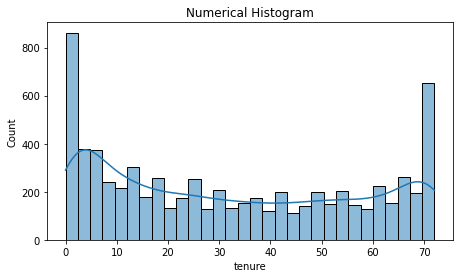

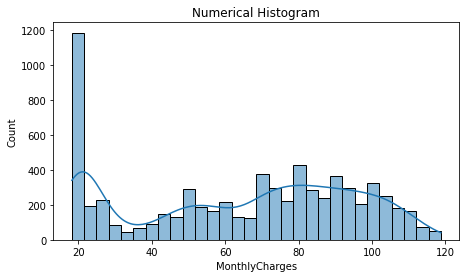

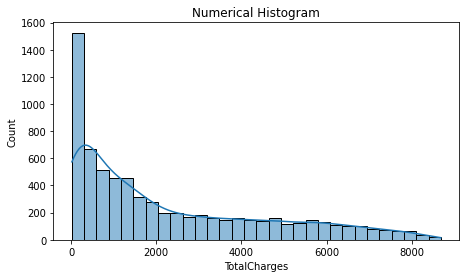

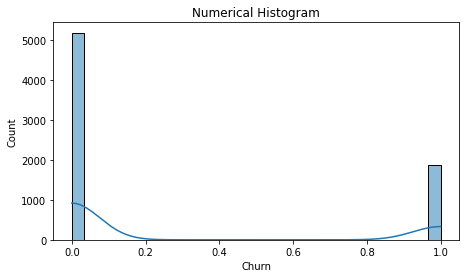

In [ ]:
# Showin plot using loop
for columns in num_col:
  distribution_plots(df,columns)

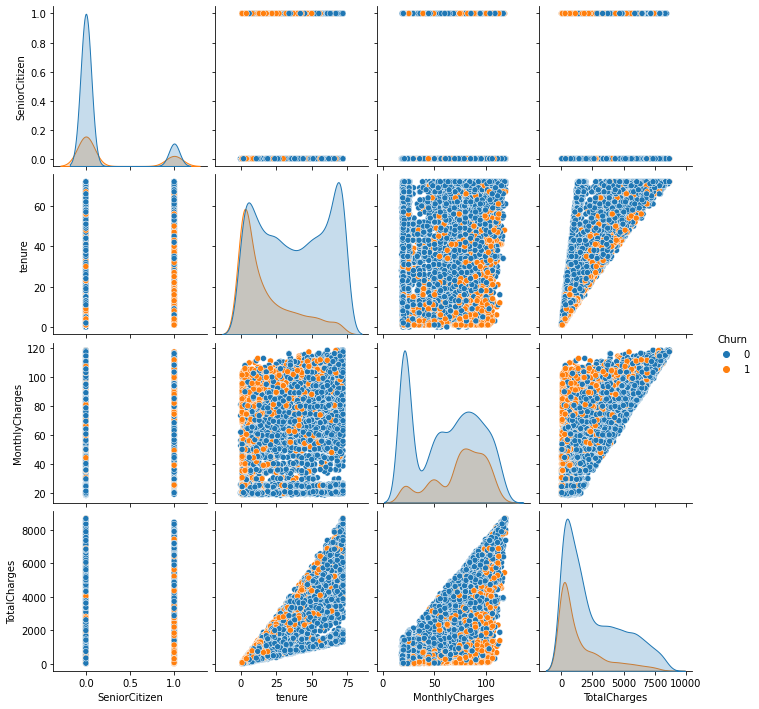

In [ ]:
# Distribution of data from the target to each feature, to see the correlation and comparison
sns.pairplot(df, hue="Churn"); 

---

***RESULT***

  1. most of the customers have service life below 20 for the lowest, and 70 for the highest.

  2. most customers have monthly charges under 20$

  3. Average tenure normally is 32

  4. Average normal monthly payment is 64$

  5. In the `MonthlyCharges` feature, which has a significant effect on churn results, customers who have `churn = yes` have a fairly cheap payment, while customers who have a value of `chur = no` have higher payments.

  6. In the `Tenure` feature, customers who have `churn = `yes` have less tenure than customers who have `churn = no`


---

## *4.2 - All Percentage Categorical Columns*

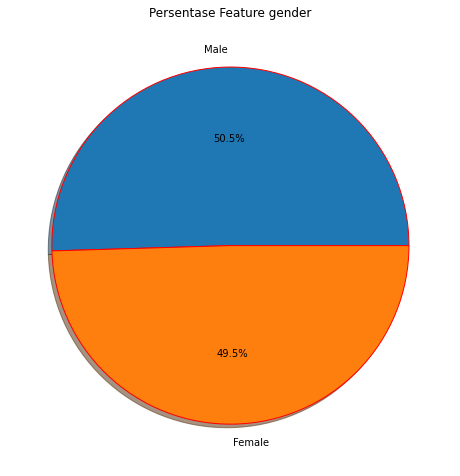

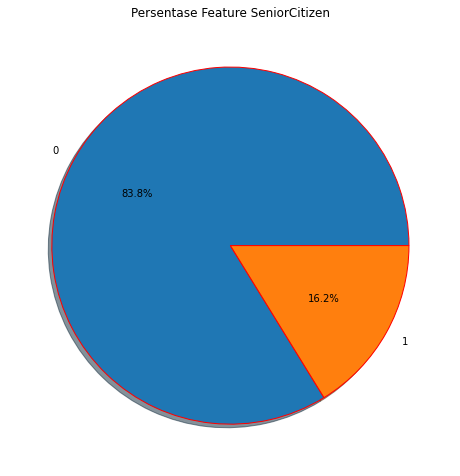

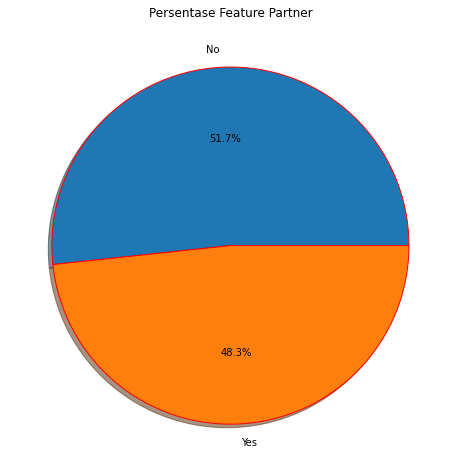

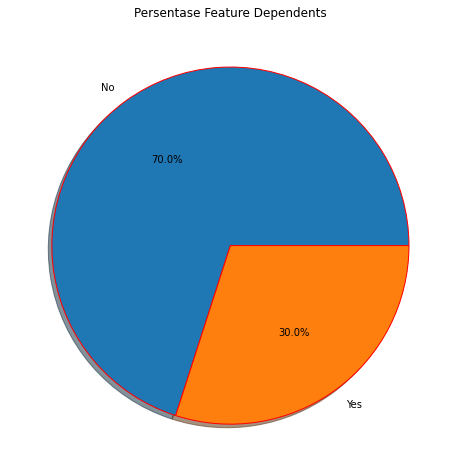

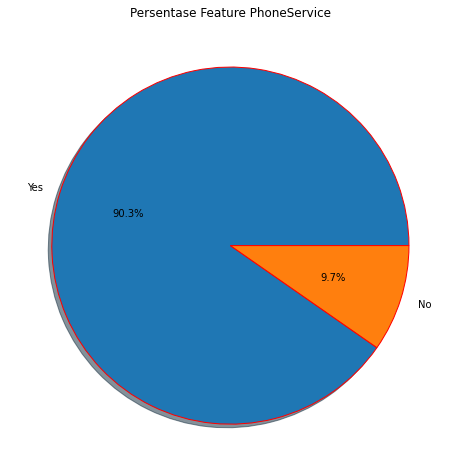

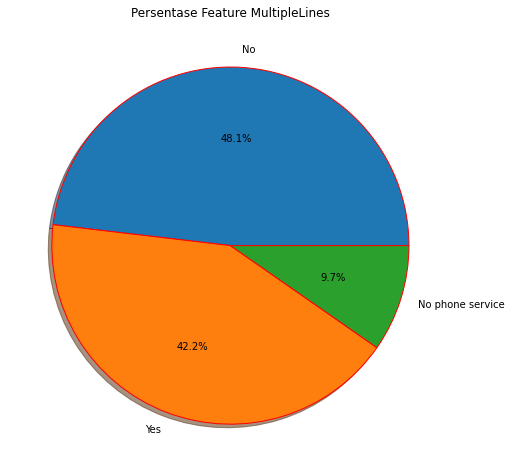

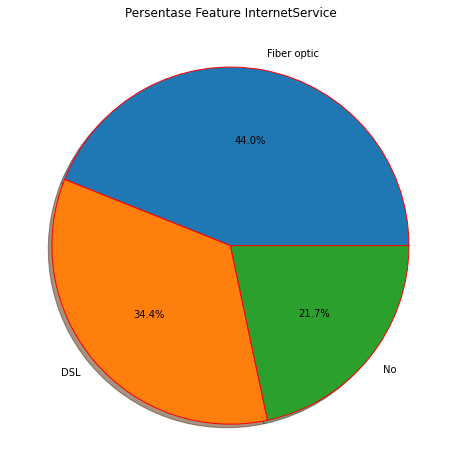

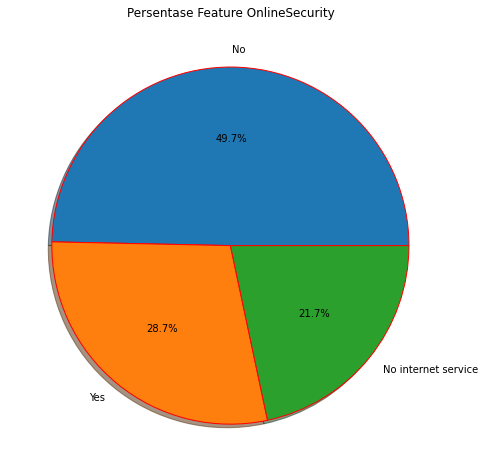

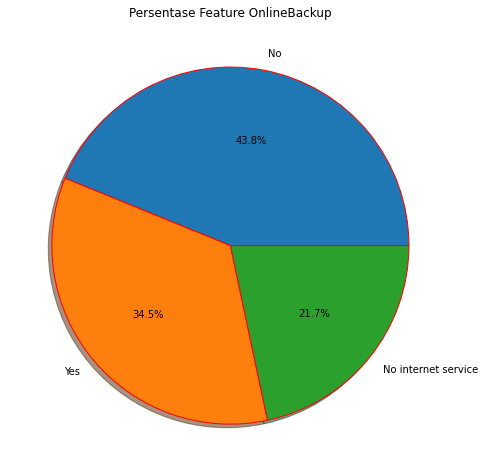

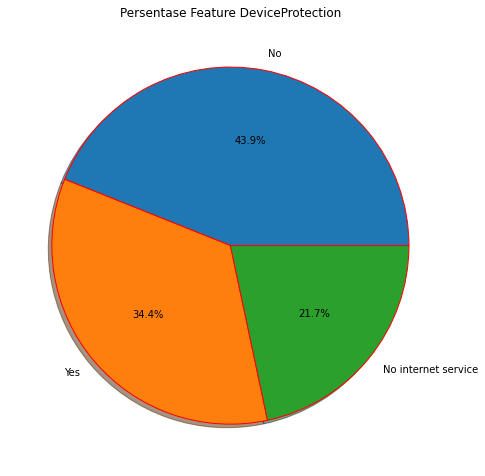

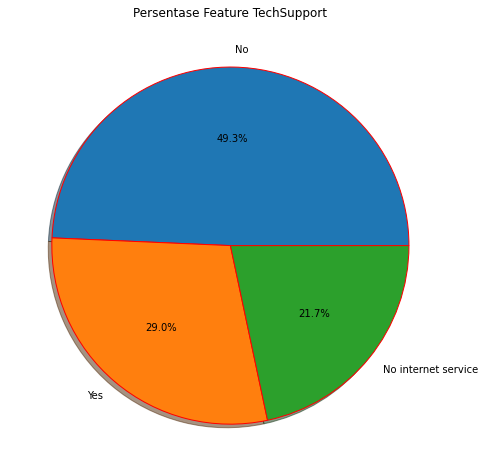

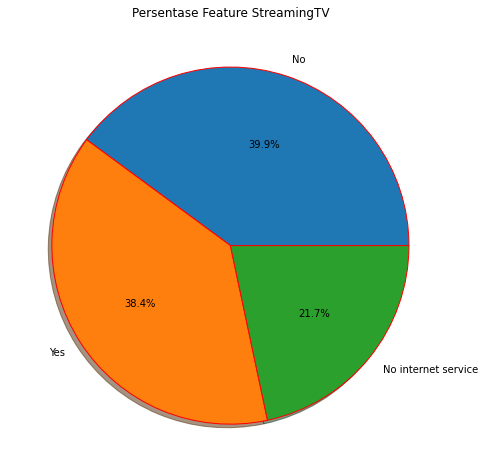

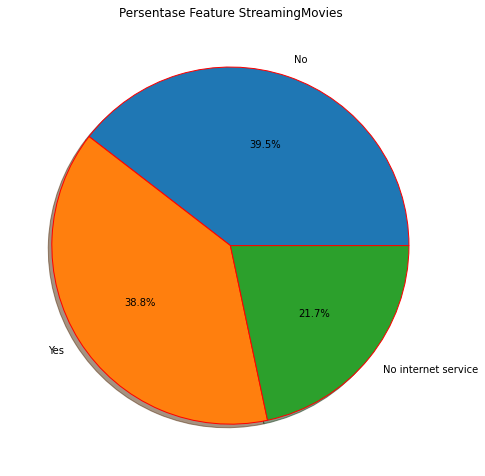

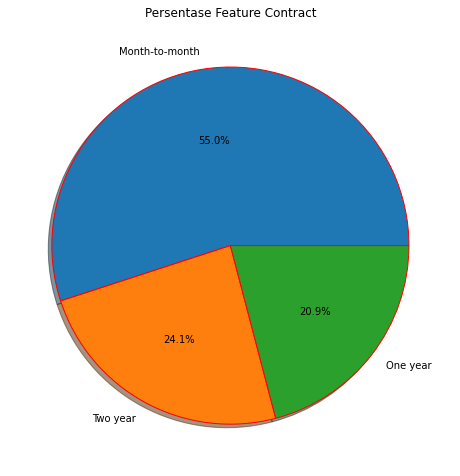

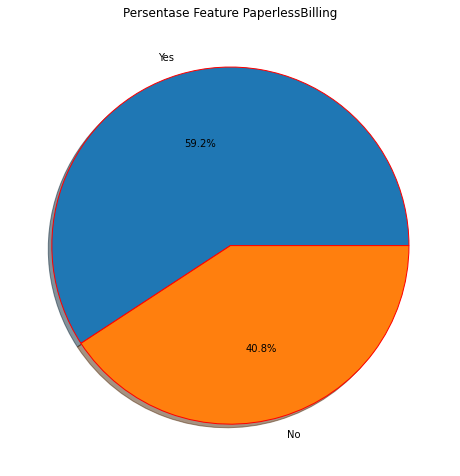

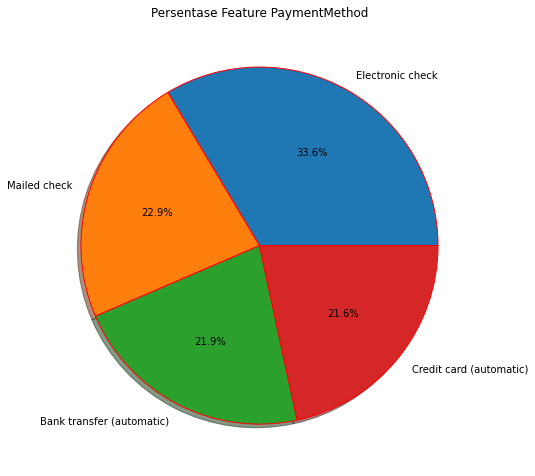

In [ ]:
# Looping percentage of each feature

# Define object feature
cd = [feature for feature in df.columns if df[feature].dtypes == 'object']
for feature in cd:
    x = df[feature].value_counts().sort_values(ascending = False)
    y = x.index
    # Define Pie Chart
    plt.figure(figsize = (8,10))
    plt.pie(x,labels = y, wedgeprops = {'edgecolor':'red'}, shadow = True, autopct = '%1.1f%%', center = (0,0))
    plt.title('Persentase Feature ' + feature)

---

***RESULT***

1. In terms of gender features, male and female have a slight difference in percentage, and this feature does not have much effect on future predictions.

2. from the `SeniorCitizen` feature, most customers are customers who are not `SeniorCitizen`, and from the result it can be concluded that most of the customers are new customers.

3. From the `partner` feature, the comparison is thin, which can be concluded if some customers are interested in subscribing.

4. From the dependents feature, it can be seen that only 30% is borne by the company, which can be concluded that this will not burden the company too much.

5. almost all customers have `phoneservice`

6. From the `internetservice` feature it can be concluded that most customers prefer to use `Fiber Optic`

7. From the `onlinesecurity` feature, only a few customers use it, which is likely that most customers don't really care about their internet security, this also happens to the `onlinebackup`, `deviceprotection`, `Techsport` features.

8. From the `Contract` feature it can be said that most customers choose to pay month-to-month


---

## *4.3 - Churn With Contract*

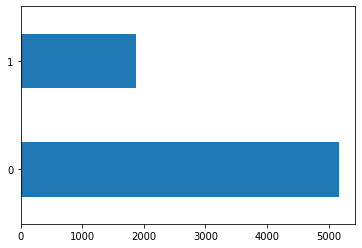

In [ ]:
# Diagnosed patient died
df['Churn'].value_counts().plot(kind='barh');

---

***RESULT***

* the target has a significant difference or imbalance, where customers who get `no` are higher than customers who have `yes`

---

In [ ]:
# Grouping and aggregating
df.groupby(by=["Churn","Contract"]).TotalCharges.agg(["mean"])

mean
Churn Contract                   
0     Month-to-month  1521.927590
      One year        2903.569908
      Two year        3678.986103
1     Month-to-month  1164.460574
      One year        4066.212048
      Two year        5432.363542

---

***RESULT***

* customers who use the annual payment method tend to have a higher total payment than monthly

---

## *4.4 - Mean Total charges from churn by dependents*

In [ ]:
# Grouping and aggregating
df.groupby(by=["Dependents","Contract"]).TotalCharges.agg(["mean"])

mean
Dependents Contract                   
No         Month-to-month  1345.992741
           One year        3196.352123
           Two year        4008.035856
Yes        Month-to-month  1460.238150
           One year        2747.339245
           Two year        3405.104167

---

***RESULT***

* the highest average total payment is owned by customers who are not the responsibility of the company

---

## *4.5 - Mean Total Charges from customer churn by paperless billing*

In [ ]:
# Grouping and aggregating
df.groupby(by=["Churn","PaperlessBilling"]).TotalCharges.agg(["mean"])

mean
Churn PaperlessBilling             
0     No                1979.968873
      Yes               3053.185098
1     No                1196.915991
      Yes               1643.980929

---

***RESULT***

* customers who get `churn == No ` with `paperless billing == 'Yes'` have a very high average total payment of up to `3000$` compared to others which is only around `1000 $` .

---

# 5.Data Preprocessing

## *5.1 - Data Inference*

In [ ]:
# Define inference data with 10 sample
df_inf = df.sample(10, random_state=20)
# Showin Data
df_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3309,Female,0,No,No,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.90,527.50,0
321,Female,0,Yes,Yes,72,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,60.00,4264.00,0
3289,Female,0,No,Yes,41,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),88.50,3645.05,0
4187,Female,0,Yes,Yes,36,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.25,717.95,0
1675,Female,0,No,No,29,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,78.90,2384.15,1
6048,Male,1,Yes,No,29,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.45,2653.65,1
1185,Female,0,No,No,1,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,60.15,60.15,1
6343,Male,0,No,No,38,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,730.10,0
5553,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Mailed check,55.70,55.70,1
6066,Male,0,No,No,2,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,94.95,178.10,1


In [ ]:
# Remove Inference-Set from Dataset
df_train_test = df.drop(df_inf.index)
# Showin data 
df_train_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


## *5.2 - Split Data*

In [ ]:
# Separate between X (feature) and y (target)

# Feature
X = df.drop(['Churn'], axis=1)
# Target
y = df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split

# Define test-set and train-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
# Define validation-set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=22)

### *5.2.1 - Feature Selection*

  * Delete the columns that are not needed
because this feature only contains facilities requested by customers
and customers who churn = yes, some ask not to receive any of the facilities.
this result is based on the analysis on EDA where these columns do not have much effect on our target `Churn` but maybe have an effect on `TotalCharges` if made a target

In [ ]:
# Delete Unneeded feature
X_train.drop(['MultipleLines','gender','Dependents', 'PhoneService', 'StreamingTV', 'StreamingMovies','PaymentMethod','PaperlessBilling'], axis=1, inplace=True)
X_val.drop(['MultipleLines','gender','Dependents', 'PhoneService', 'StreamingTV', 'StreamingMovies','PaymentMethod','PaperlessBilling'], axis=1, inplace=True)
X_test.drop(['MultipleLines','gender','Dependents', 'PhoneService', 'StreamingTV', 'StreamingMovies','PaymentMethod','PaperlessBilling'] ,axis=1, inplace=True)

In [ ]:
# Seperate numeric and categorical columns
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()
# Print Result
print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['SeniorCitizen', 'Partner', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract']


## *5.3 - Data Cleaning*

### *5.3.1 - Missing Value*

In [ ]:
X_train.isna().sum()

SeniorCitizen        0
Partner              0
tenure               0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
Contract             0
MonthlyCharges       0
TotalCharges        10
dtype: int64

In [ ]:
y_train.isna().sum()

0

In [ ]:
# Using median imputer because feature just have a little missing value, and the feature is numerical columns contains money earnings
X_train['TotalCharges'].fillna(X_train['TotalCharges'].median(), inplace=True)

we get missing values ​​on `totalcharges` on X_train in train-set

In [ ]:
X_test.isna().sum()

SeniorCitizen       0
Partner             0
tenure              0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [ ]:
y_test.isna().sum()

0

we dont have missing values ​​on test-set

In [ ]:
X_val.isna().sum()

SeniorCitizen       0
Partner             0
tenure              0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [ ]:
y_val.isna().sum()

0

In [ ]:
# Using median imputer because feature just have a little missing value, and the feature is numerical columns contains money earnings
X_val['TotalCharges'].fillna(X_val['TotalCharges'].median(), inplace=True)

we get missing values ​​on `TotalCharges` on X_val in val-set

### *5.3.2 - Outlier*

In [ ]:
def check_outliers(data, column):
    skewness = data[column].skew(axis=0, skipna=True)
    if skewness <= 0.5 and skewness >=-0.5:
       
        upper_boundary = data[column].mean() + 3 * data[column].std()
        lower_boundary = data[column].mean() - 3 * data[column].std()
        print(['Normal'])
        print(f'Upper Boundary of {column}:', upper_boundary)
        print(f'Lower Boundary of {column}:', lower_boundary)
        jumlah_outlier_upper = format(len(data[data[column] > upper_boundary]))
        print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
        jumlah_outlier_lower  = format(len(data[data[column]<lower_boundary]))
        print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
        persentase_outlier_upper = format(len(data[data[column] > upper_boundary])  / len(data)*100)
        print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
        persentase_outlier_lower = format(len(data[data[column] < lower_boundary])  / len(data)*100)
        print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
        print('-'*100)
    else:
         IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
         lower_boundary = data[column].quantile(0.25) - (IQR * 1.5)
         upper_boundary = data[column].quantile(0.75) + (IQR * 1.5)
         print(['Skewed'])
         print(f'Upper Boundary of {column}:', upper_boundary)
         print(f'Lower Boundary of {column}:', lower_boundary)
         jumlah_outlier_upper = format(len(data[data[column] > upper_boundary]))
         print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
         jumlah_outlier_lower  = format(len(data[data[column]<lower_boundary]))
         print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
         persentase_outlier_upper = format(len(data[data[column] > upper_boundary])  / len(data)*100)
         print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
         persentase_outlier_lower = format(len(data[data[column] < lower_boundary])  / len(data)*100)
         print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
         print('-'*100)

In [ ]:
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
for column in num_columns:
     check_outliers(X_train, column)

['Normal']
Upper Boundary of tenure: 105.6603275236078
Lower Boundary of tenure: -41.84770424944606
Total Data Above Upper Boundary tenure: 0
Total Data Below Lower Boundary tenure: 0
% Data Above Upper Boundary tenure: 0.0
% Data Below Lower Boundary tenure: 0.0
----------------------------------------------------------------------------------------------------
['Normal']
Upper Boundary of MonthlyCharges: 154.33245268826352
Lower Boundary of MonthlyCharges: -25.261703181360048
Total Data Above Upper Boundary MonthlyCharges: 0
Total Data Below Lower Boundary MonthlyCharges: 0
% Data Above Upper Boundary MonthlyCharges: 0.0
% Data Below Lower Boundary MonthlyCharges: 0.0
----------------------------------------------------------------------------------------------------
['Skewed']
Upper Boundary of TotalCharges: 8779.8
Lower Boundary of TotalCharges: -4663.099999999999
Total Data Above Upper Boundary TotalCharges: 0
Total Data Below Lower Boundary TotalCharges: 0
% Data Above Upper Boun

In [ ]:
def diagnostic_plots(df, column):
  skewness = df[column].skew(axis=0, skipna = True)
  print(f'Skewness of {column} =',skewness)

for column in num_columns:
     diagnostic_plots(X_train, column)

Skewness of tenure = 0.26483277252688714
Skewness of MonthlyCharges = -0.2131012144716109
Skewness of TotalCharges = 0.9904376967587856


---

***RESULT***

* We dont have outlier in this session, and the distribution has normally distributed

---

## *5.4 - Feature Engineering*

In [ ]:
# Build pipeline for engineering the feature

# Define numeric pipeline
num_pipeline = make_pipeline(StandardScaler())
# Define Categorical pipeline
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

# Define Final pipline and using this for fit train-set and transform all data
data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)])

In [ ]:
# Fit and transform the data
X_train = data_pipeline.fit_transform(X_train)
X_val = data_pipeline.transform(X_val)
X_test = data_pipeline.transform(X_test)
# Print Result
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(5070, 25)
(1409, 25)
(564, 25)


In [ ]:
# Saving the pipeline and using this file for deployment

with open("preprocessing.pkl", "wb") as f:
    pickle.dump(data_pipeline, f)

# 6.Model Architecture

## *6.1 - Sequential API*

In [ ]:
# Build TensorFlow Pipeline and define batch in order to have stability in processing and managing data
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(64)

In [ ]:
# Build Architecture

# Define Model
model_seq = Sequential()
# Layer 1
model_seq.add(Dense(20, activation='relu',  input_shape=(25,)))
model_seq.add(Dropout(0.25)) # prevent overfitting by 0.25
# Layer 2
model_seq.add(Dense(10, activation="relu"))
model_seq.add(Dropout(0.25)) # prevent overfitting by 0.25
# Output Layer
model_seq.add(Dense(1, activation='sigmoid')) # use sigmoid due to binary classification

In [ ]:
# Compile squential model

model_seq.compile(loss='binary_crossentropy', # using binary entropy for binary classifier
              optimizer='adam', # calculate learning rate
              metrics=['accuracy']) # Evaluation by accuracy

In [ ]:
# Fit model
history = model_seq.fit(train_dataset,
                    epochs=300,
                    validation_data=val_dataset)

Epoch 1/300
80/80 [==============================] - 1s 4ms/step - loss: 0.6650 - accuracy: 0.6087 - val_loss: 0.5661 - val_accuracy: 0.7447
Epoch 2/300
80/80 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.7505 - val_loss: 0.4842 - val_accuracy: 0.7801
Epoch 3/300
80/80 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.7574 - val_loss: 0.4674 - val_accuracy: 0.7961
Epoch 4/300
80/80 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7763 - val_loss: 0.4601 - val_accuracy: 0.7943
Epoch 5/300
80/80 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.7797 - val_loss: 0.4587 - val_accuracy: 0.7943
Epoch 6/300
80/80 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.7836 - val_loss: 0.4578 - val_accuracy: 0.7943
Epoch 7/300
80/80 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.7842 - val_loss: 0.4559 - val_accuracy: 0.7979
Epoch 8/300
8

### *6.1.1 - Model Evaluation*

In [ ]:
# Review result in dataset
metrics_seq = pd.DataFrame(history.history)
metrics_seq.head()

,loss,accuracy,val_loss,val_accuracy
0,0.665036,0.608679,0.566059,0.744681
1,0.535424,0.750493,0.484231,0.780142
2,0.486762,0.757396,0.467362,0.796099
3,0.467527,0.776331,0.460060,0.794326
4,0.456661,0.779684,0.458700,0.794326


In [ ]:
metrics_seq.mean()

loss            0.412863
accuracy        0.805613
val_loss        0.447191
val_accuracy    0.794261
dtype: float64

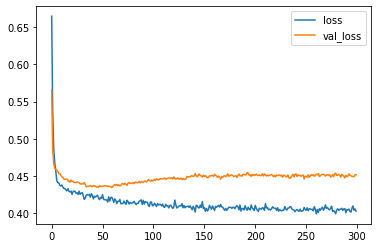

In [ ]:
metrics_seq[['loss','val_loss']].plot();

---

***RESULT***

* in the plot above it can be seen that if the loss and validation lines are not too far apart, then the model can be said to be not overfit, and close to good fit.

---

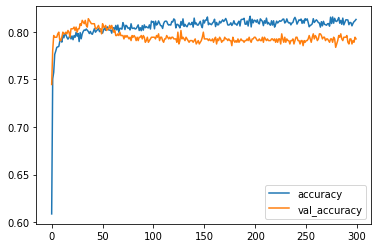

In [ ]:
metrics_seq[['accuracy', 'val_accuracy']].plot();

---

***RESULT***

* From the results of the plot above, it is clear if the results of the accuracy coincide with the validation, from these results the model is said to be in good fit.

---

In [ ]:
# Predict Test
y_pred = model_seq.predict(X_test)
y_pred = np.where(y_pred < 0.5, 0, 1).squeeze()

In [ ]:
# Report
print('________________________________________________________________________________________________________________')
print('Classification Report :')
print(classification_report(y_test, y_pred))
print('________________________________________________________________________________________________________________')

________________________________________________________________________________________________________________
Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1012
           1       0.64      0.46      0.54       397

    accuracy                           0.78      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.76      0.78      0.76      1409

________________________________________________________________________________________________________________


### *6.1.2 - Conclusion*

-----

1. Using dropout 0.25 is quite good in preventing overfitting and underfitting, in the previous experiment using 0.50 under fitting occurred, and the possibility of a good dropout value in preventing the model from remaining stable in this data is 0.25.

2. Accuracy is not very good in `class == yes' which may be due to the small amount of data and the absence of handling data imbalance, and possibly also due to the small amount of total data.

3. using 2 layers, it's good enough for this model processing because the results give a stable impression, although they don't have good results on accuracy and other metrics.


----

## *6.2 - Functional API*

In [ ]:
# Build Architecture
data_input = Input(shape=(25,))
# Layer 1
hidden_1 = Dense(20, activation='relu')(data_input)
hidden_drop_1 = Dropout(0.50)(hidden_1)
# layer 2
hidden_2 = Dense(10, activation='relu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.50)(hidden_2)
# Output layer
output = Dense(1, activation='sigmoid')(hidden_drop_2)
# Define model
model_func = Model(inputs=data_input, outputs=output)

In [ ]:
# Compile Model
model_func.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Fit model
history_func = model_func.fit(train_dataset,
                    epochs=300,
                    validation_data=val_dataset)

Epoch 1/300
80/80 [==============================] - 1s 3ms/step - loss: 0.6953 - accuracy: 0.5671 - val_loss: 0.5463 - val_accuracy: 0.7358
Epoch 2/300
80/80 [==============================] - 0s 2ms/step - loss: 0.5720 - accuracy: 0.6951 - val_loss: 0.4930 - val_accuracy: 0.7429
Epoch 3/300
80/80 [==============================] - 0s 2ms/step - loss: 0.5390 - accuracy: 0.7243 - val_loss: 0.4748 - val_accuracy: 0.7482
Epoch 4/300
80/80 [==============================] - 0s 2ms/step - loss: 0.5135 - accuracy: 0.7414 - val_loss: 0.4690 - val_accuracy: 0.7518
Epoch 5/300
80/80 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.7440 - val_loss: 0.4651 - val_accuracy: 0.7500
Epoch 6/300
80/80 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.7548 - val_loss: 0.4651 - val_accuracy: 0.7571
Epoch 7/300
80/80 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.7615 - val_loss: 0.4626 - val_accuracy: 0.7766
Epoch 8/300
8

### *6.2.1 -  Model Evaluation*

In [ ]:
# Review Result in dataset
metrics_funct = pd.DataFrame(history.history)
metrics_funct.head()

,loss,accuracy,val_loss,val_accuracy
0,0.665036,0.608679,0.566059,0.744681
1,0.535424,0.750493,0.484231,0.780142
2,0.486762,0.757396,0.467362,0.796099
3,0.467527,0.776331,0.460060,0.794326
4,0.456661,0.779684,0.458700,0.794326


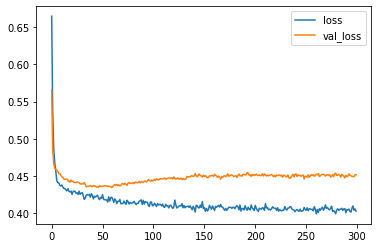

In [ ]:
# Plot loss result
metrics_funct[['loss','val_loss']].plot();

---

***RESULT***

* in the plot above it can be seen that if the loss and validation lines are not too far apart, then the model can be said to be not overfit, and close to good fit.

---

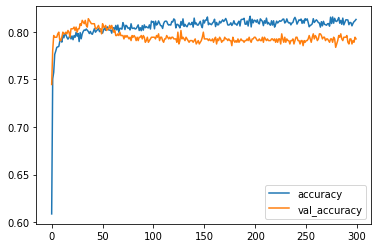

In [ ]:
# Plot Accuracy result
metrics_funct[['accuracy', 'val_accuracy']].plot();

---

***RESULT***

* From the results of the plot above, it is clear if the results of the accuracy coincide with the validation, from these results the model is said to be in good fit.

---

In [ ]:
# Predict 
y_pred_func = model_func.predict(X_test)
y_pred_func = np.where(y_pred_func < 0.5, 0, 1).squeeze()

In [ ]:
# Report
print('________________________________________________________________________________________________________________')
print('Classification Report :')
print(classification_report(y_test, y_pred_func))
print('________________________________________________________________________________________________________________')

________________________________________________________________________________________________________________
Classification Report :
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1012
           1       0.69      0.34      0.45       397

    accuracy                           0.77      1409
   macro avg       0.74      0.64      0.65      1409
weighted avg       0.76      0.77      0.74      1409

________________________________________________________________________________________________________________


### *6.2.2 - Conclusion*

-----

1. Using dropout 0.25 is quite good in preventing overfitting and underfitting, in the previous experiment using 0.50 under fitting occurred, and the possibility of a good dropout value in preventing the model from remaining stable in this data is 0.25.

2. Accuracy is not very good in `class == yes' which may be due to the small amount of data and the absence of handling data imbalance, and possibly also due to the small amount of total data.

3. using 2 layers, it's good enough for this model processing because the results give a stable impression, although they don't have good results on accuracy and other metrics.

4. this result is not too much different from the result of the `sequential` model the difference is only -1% in the `sequential` model


----

## *6.3 - Model Saving*

In [ ]:
model_seq.save('Model_seq.h5')

# 7.Model Inference

In [ ]:
# Define Data Inference
data_inf = df_inf.sample(10, random_state=22)

In [ ]:
# Remove Inf-Set from Dataset

data_train_test = df.drop(data_inf.index)
data_train_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [ ]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,Yes,41,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),88.50,3645.05,0
1,Female,0,Yes,Yes,72,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,60.00,4264.00,0
2,Male,0,No,No,2,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,94.95,178.10,1
3,Female,0,No,No,1,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,60.15,60.15,1
4,Female,0,Yes,Yes,36,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.25,717.95,0
5,Male,0,No,No,38,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,730.10,0
6,Female,0,No,No,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.90,527.50,0
7,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Mailed check,55.70,55.70,1
8,Female,0,No,No,29,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,78.90,2384.15,1
9,Male,1,Yes,No,29,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.45,2653.65,1


In [ ]:
# Feature Engineering inference-set
data_inf_final = data_pipeline.transform(data_inf)

In [ ]:
# Load Model
saved_model=load_model('Model_seq.h5')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                520       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Predict inference-set
y_pred_inf = saved_model.predict(data_inf_final)
# Review to dataframe
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Churn-Prediction'])
y_pred_inf_df

,Churn-Prediction
0,0.351931
1,0.021429
2,0.901057
3,0.512322
4,0.002629
5,0.007753
6,0.015126
7,0.560408
8,0.342114
9,0.574918


In [ ]:
# Concate predict dataframe with inference-set
data_inf_concat = pd.concat([data_inf, y_pred_inf_df],axis=1)
data_inf_concat

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn-Prediction
0,Female,0,No,Yes,41,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),88.50,3645.05,0,0.351931
1,Female,0,Yes,Yes,72,No,No phone service,DSL,No,Yes,...,Yes,Yes,Yes,Two year,Yes,Electronic check,60.00,4264.00,0,0.021429
2,Male,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,No,Electronic check,94.95,178.10,1,0.901057
3,Female,0,No,No,1,Yes,Yes,DSL,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,60.15,60.15,1,0.512322
4,Female,0,Yes,Yes,36,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.25,717.95,0,0.002629
5,Male,0,No,No,38,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,730.10,0,0.007753
6,Female,0,No,No,25,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.90,527.50,0,0.015126
7,Male,0,No,No,1,Yes,No,DSL,No,No,...,No,No,Yes,Month-to-month,Yes,Mailed check,55.70,55.70,1,0.560408
8,Female,0,No,No,29,Yes,No,Fiber optic,No,No,...,No,Yes,No,Month-to-month,Yes,Electronic check,78.90,2384.15,1,0.342114
9,Male,1,Yes,No,29,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.45,2653.65,1,0.574918


# 8.Overall Conclusion

---

# *EDA*

1. In terms of gender features, male and female have a slight difference in percentage, and this feature does not have much effect on future predictions.

2. from the `SeniorCitizen` feature, most customers are customers who are not `SeniorCitizen`, and from the result it can be concluded that most of the customers are new customers.

3. From the `partner` feature, the comparison is thin, which can be concluded if some customers are interested in subscribing.

4. From the dependents feature, it can be seen that only 30% is borne by the company, which can be concluded that this will not burden the company too much.

5. almost all customers have `phoneservice`

6. From the `internetservice` feature it can be concluded that most customers prefer to use `Fiber Optic`

7. From the `onlinesecurity` feature, only a few customers use it, which is likely that most customers don't really care about their internet security, this also happens to the `onlinebackup`, `deviceprotection`, `Techsport` features.

8. From the `Contract` feature it can be said that most customers choose to pay month-to-month

9. customers who use the annual payment method tend to have a higher total payment than monthly

10. customers who get `churn == No ` with `paperless billing == 'Yes'` have a very high average total payment of up to `3000$` compared to others which is only around `1000 $` .

11. the highest average total payment is owned by customers who are not the responsibility of the company


---

# *Modelling*

1. Using dropout 0.25 is quite good in preventing overfitting and underfitting, in the previous experiment using 0.50 under fitting occurred, and the possibility of a good dropout value in preventing the model from remaining stable in this data is 0.25.

2. Accuracy is not very good in `class == yes' which may be due to the small amount of data and the absence of handling data imbalance, and possibly also due to the small amount of total data.

3. using 2 layers, it's good enough for this model processing because the results give a stable impression, although they don't have good results on accuracy and other metrics.

4. the sequential model is better at predicting `yes`, so use the sequential model as the final result

5. Using the pipeline to process the model tends to be faster in the modeling process

6. Both models cannot be said to be good, but they can be said to be both stable and do not experience overfit and are close to good fit if we look at the comparison between accuracy and validation.

---